In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
import re
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
df=pd.read_csv('/content/drive/My Drive/train.csv')

In [3]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [27]:
cs=df['abs_clean2'][df['Computer Science']==1]
phy=df['abs_clean2'][df['Physics']==1]
stat=df['abs_clean2'][df['Statistics']==1]
qb=df['abs_clean2'][df['Quantitative Biology']==1]
qf=df['abs_clean2'][df['Quantitative Finance']==1]
maths=df['abs_clean2'][df['Mathematics']==1]


In [ ]:
#Computer Science	Physics	Mathematics	Statistics	Quantitative Biology	Quantitative Financ

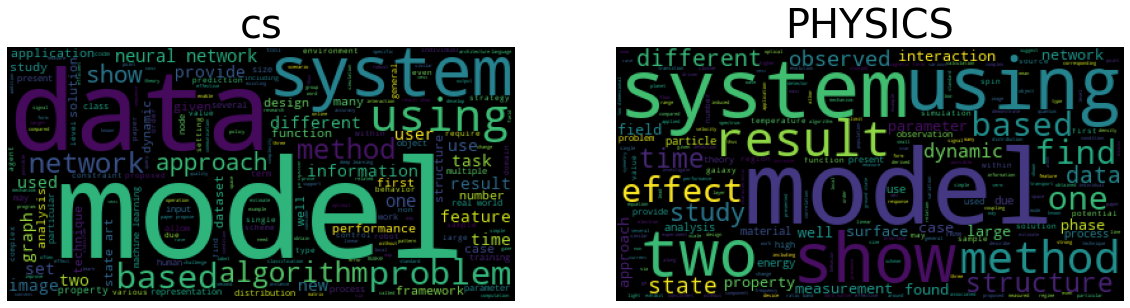

In [28]:
ig,ax=plt.subplots(1,2,figsize=[20,10])
w1=WordCloud().generate(''.join(cs))
ax[0].imshow(w1)
ax[0].axis('off')
ax[0].set_title('cs',fontsize=40);

w2=WordCloud().generate(''.join(phy))
ax[1].imshow(w2)
ax[1].axis('off')
ax[1].set_title('PHYSICS',fontsize=40);

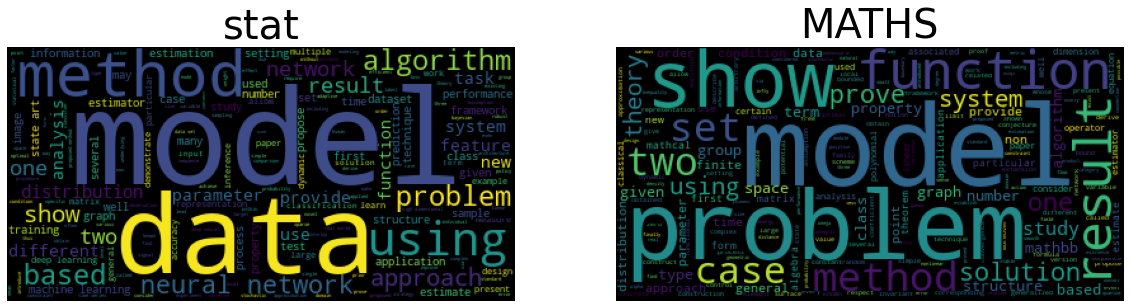

In [29]:
big,ax=plt.subplots(1,2,figsize=[20,10])
w3=WordCloud().generate(''.join(stat))
ax[0].imshow(w3)
ax[0].axis('off')
ax[0].set_title('stat',fontsize=40);

w4=WordCloud().generate(''.join(maths))
ax[1].imshow(w4)
ax[1].axis('off')
ax[1].set_title('MATHS',fontsize=40);

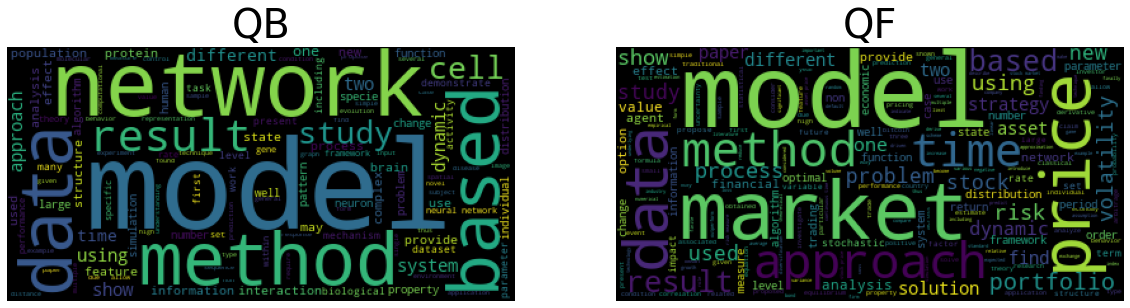

In [30]:
big,ax=plt.subplots(1,2,figsize=[20,10])
w5=WordCloud().generate(''.join(qb))
ax[0].imshow(w5)
ax[0].axis('off')
ax[0].set_title('QB',fontsize=40);

w6=WordCloud().generate(''.join(qf))
ax[1].imshow(w6)
ax[1].axis('off')
ax[1].set_title('QF',fontsize=40);

In [5]:
#df['len_abs']=df['ABSTRACT'].apply(lambda x: len(x))
df['combine']=df['TITLE']+df['ABSTRACT']

In [5]:
df['combine'][1]

'Rotation Invariance Neural Network  Rotation invariance and translation invariance have great values in image\nrecognition tasks. In this paper, we bring a new architecture in convolutional\nneural network (CNN) named cyclic convolutional layer to achieve rotation\ninvariance in 2-D symbol recognition. We can also get the position and\norientation of the 2-D symbol by the network to achieve detection purpose for\nmultiple non-overlap target. Last but not least, this architecture can achieve\none-shot learning in some cases using those invariance.\n'

In [6]:
def clean(text):
    text=re.sub(r'\\','',text)#remove \\
    text=re.sub(r'[$|\n]',' ',text)
    text=re.sub('\w+\s{2,}\w+',' ',text)#remove 2 spaces
    text=re.sub('[%s]' % re.escape(string.punctuation),' ',text)#remoev punctautions
    text=re.sub('\d','',text)#remove numbers
    text=re.sub('\s+[a-zA-Z0-9]\s+',' ',text)
    text=text.lower()
    text=text.strip()
    token=word_tokenize(text)
    stop=[t for t in token if t not in (stopwords.words('english'))]
    
    return ' '.join(stop)

df['clean_combine']=df['combine'].apply(lambda x: clean(x))    

In [12]:
from collections import Counter

text=' '.join(df['clean_combine'])
text=word_tokenize(text)
#text
count=Counter(text)
#Before CLeanning
def plot(most_common,rev=None):
    labels=[]
    values=[]
    for ind,num in enumerate(most_common):
        labels.append(num[0])
        values.append(num[1])
    plt.figure(figsize=(20,6))
    sns.barplot(labels,values)
    if rev:
        plt.title('Least_common')
    else:
        plt.title('Most_common')


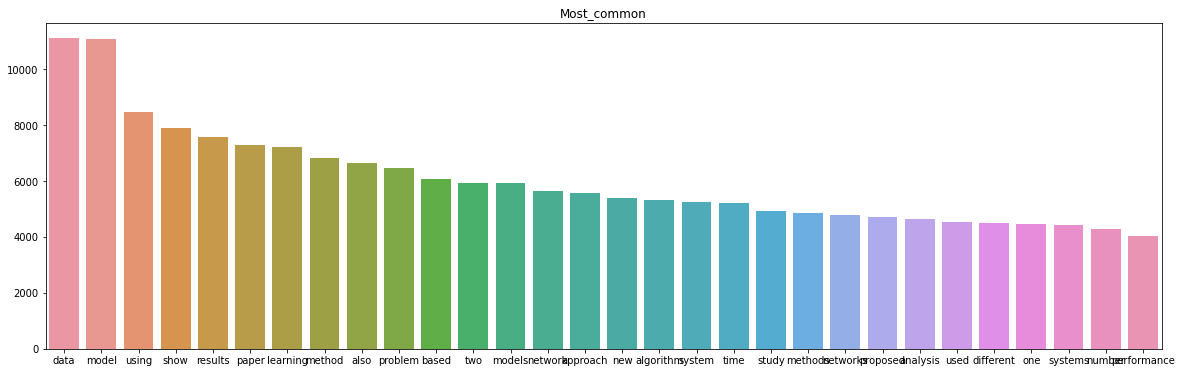

In [13]:
plot(count.most_common(30))

In [7]:
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
stem=nltk.SnowballStemmer(language='english')

In [8]:
def tokenize(text):
  
  token=word_tokenize(text)
  stop=[t for t in token if t not in (stopwords.words('english'))]
  #stemmer=[stem.stem(t) for t in stop ]
  lemma=[wl.lemmatize(t) for t in stop]
  res=  ' '.join(lemma)

  return res

df['clean2'] =df['clean_combine'].apply(lambda x:tokenize(x))

In [9]:
df['clean2']

0        reconstructing subject specific effect model a...
1        rotation invariance neural invariance translat...
2        spherical polyharmonics poisson kernel polyhar...
3        finite element approximation stochastic maxwel...
4        comparative study discrete wavelet transforms ...
                               ...                        
20967    contemporary machine learning guide practition...
20968    uniform diamond coating wc co hard alloy cutti...
20969    analysing soccer game clustering present new a...
20970    efficient simulation left tail sum correlated ...
20971    optional stopping problem optional stopping su...
Name: clean2, Length: 20972, dtype: object

In [24]:
'''
print(df['combine'][19445])
print('=----')
print(df['clean_combine'][19445])
print()
print(df['clean2'][19445])
print()
'''

"\nprint(df['combine'][19445])\nprint('=----')\nprint(df['clean_combine'][19445])\nprint()\nprint(df['clean2'][19445])\nprint()\n"

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [11]:
from sklearn.model_selection import train_test_split

X=df['clean2']
y=df[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

x_train,x_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.30)

In [14]:
print('shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_train',y_train.shape)

shape of x_train (14680,)
shape of x_test (6292,)
shape of y_train (14680, 6)


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [13]:
pip_mnb=Pipeline([('tfidf',TfidfVectorizer(max_df=0.85, min_df=1,analyzer='word', ngram_range=(1,3))),
                  ('clf', OneVsRestClassifier(MultinomialNB()))])


In [20]:
pip_svc=Pipeline([('tfidf',TfidfVectorizer(max_df=0.95, min_df=1,analyzer='word', ngram_range=(1,3))),
            ('clf', OneVsRestClassifier(LinearSVC(penalty='l2')))])

pip_svc.fit(x_train,y_train)
predict=pip_svc.predict(x_test)

print('Accuracy wrtis-- ',accuracy_score(y_test,predict))
print('f1_score micro--',f1_score(y_test,predict,average='micro'))
print('f1_score macro--',f1_score(y_test,predict,average='macro'))

Accuracy wrtis--  0.6675143038779402
f1_score micro-- 0.8244178728760228
f1_score macro-- 0.6975835490848988


In [42]:
pip_log=Pipeline([('tfidf',TfidfVectorizer(max_df=0.95, min_df=1,max_features=5000,analyzer='word', ngram_range=(1,3))),
            ('clf', OneVsRestClassifier(MultinomialNB()))])
pip_log.fit(x_train,y_train)
predict=pip_log.predict(x_test)
  
print('Accuracy is-- ',accuracy_score(y_test,predict))
print('f1 score',f1_score(y_test,predict,average='micro'))
print('-------')

Accuracy is--  0.6336617927527018
f1 score 0.8017131168499105
-------


In [40]:
from sklearn.metrics import f1_score
pip_hash=Pipeline([('tfidf',HashingVectorizer(n_features=5000,analyzer='word', ngram_range=(1,3))),
            ('clf', OneVsRestClassifier(LinearSVC(penalty='l2')))])

pip_hash.fit(x_train,y_train)
predict=pip_hash.predict(x_test)
  
print('Accuracy is-- ',accuracy_score(y_test,predict))
print('f1 score',f1_score(y_test,predict,average='micro'))
print('-------')

Accuracy is--  0.5616656071201526
f1 score 0.7491740451962469
-------


In [21]:
test=pd.read_csv('/content/drive/My Drive/test.csv')
test.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [22]:
test['combine']=test['TITLE']+test['ABSTRACT']

In [23]:
test['clean_combine']=test['combine'].apply(lambda x: clean(x))    

In [24]:
test['clean_combine']=test['clean_combine'].apply(lambda x: tokenize(x))    

In [88]:
test=test.drop(test.iloc[:,-6:].columns,axis=1)

In [25]:
test.head()

,ID,TITLE,ABSTRACT,combine,clean_combine
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,Closed-form Marginal Likelihood in Gamma-Poiss...,closed form marginal likelihood gamma poisson ...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,Laboratory mid-IR spectra of equilibrated and ...,laboratory mid ir spectrum equilibrated igneou...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,Case For Static AMSDU Aggregation in WLANs Fr...,case static amsdu aggregation aggregation mech...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,The $Gaia$-ESO Survey: the inner disk intermed...,eso survey inner disk intermediate age open cl...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,Witness-Functions versus Interpretation-Functi...,witness function versus interpretation functio...


In [26]:
pip_svc=Pipeline([('tfidf',TfidfVectorizer(max_df=0.95, min_df=1,analyzer='word', ngram_range=(1,3))),
            ('clf', OneVsRestClassifier(LinearSVC(penalty='l2')))])

pip_svc.fit(x_train,y_train)
predict=pip_svc.predict(test['clean_combine'])


[[0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [1 0 0 1 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]]


In [29]:
test_pred=pd.DataFrame(predict,columns=['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'])
test_pred

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
8984,1,0,0,0,0,0
8985,1,0,1,0,0,0
8986,1,0,0,1,0,0
8987,0,0,0,1,0,0


In [33]:
final=pd.concat([test,test_pred],axis=1)
final=final.drop(final.iloc[:,1:5],axis=1)
final
final.to_csv("submission_linear_svc.csv",index = False)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0
...,...,...,...,...,...,...,...
8984,29957,1,0,0,0,0,0
8985,29958,1,0,1,0,0,0
8986,29959,1,0,0,1,0,0
8987,29960,0,0,0,1,0,0
